# PRACTICE PROJECT - 2

# Salary Project

<b>Problem Statement:</b>

Predict the salary if the employee using the features provided in the data. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [5]:
df.sample(3)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
211,Prof,B,39,39,Male,111350
164,AsstProf,B,1,0,Male,88795
256,Prof,A,22,22,Male,140300


In [6]:
type(df.columns)

pandas.core.indexes.base.Index

In [7]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
df.isnull()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
392,False,False,False,False,False,False
393,False,False,False,False,False,False
394,False,False,False,False,False,False
395,False,False,False,False,False,False


In [9]:
# Here, we get the total number of null values present in any particular column

df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [10]:
# Here, we are finding out the total number of null values in our complete dataset

df.isnull().sum().sum()

0

In [11]:
df.drop_duplicates()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


<b>There are categorical values present in the columns "rank", "discipline" and "sex"</b>

<b>So, let's check the unique values present in these columns</b>

In [12]:
value1 = df[['rank']].values.ravel()
unique_values_rank = pd.unique(value1)
unique_values_rank 

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [13]:
value2 = df[['discipline']].values.ravel()
unique_values_discipline = pd.unique(value2)
unique_values_discipline 

array(['B', 'A'], dtype=object)

In [14]:
value3 = df[['sex']].values.ravel()
unique_values_sex = pd.unique(value3)
unique_values_sex 

array(['Male', 'Female'], dtype=object)

<b>Now, let's convert the categorical values into numerical values</b>

In [15]:
def Rank(x):
    if x == 'Prof':
        return 1
    if x == 'AsstProf':
        return 2
    if x == 'AssocProf':
        return 3

In [16]:
df['rank']=df['rank'].apply(Rank)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,B,19,18,Male,139750
1,1,B,20,16,Male,173200
2,2,B,4,3,Male,79750
3,1,B,45,39,Male,115000
4,1,B,40,41,Male,141500
...,...,...,...,...,...,...
392,1,A,33,30,Male,103106
393,1,A,31,19,Male,150564
394,1,A,42,25,Male,101738
395,1,A,25,15,Male,95329


In [17]:
def Discipline(x):
    if x == 'A':
        return 0
    if x == 'B':
        return 1

In [18]:
df['discipline']=df['discipline'].apply(Discipline)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,1,19,18,Male,139750
1,1,1,20,16,Male,173200
2,2,1,4,3,Male,79750
3,1,1,45,39,Male,115000
4,1,1,40,41,Male,141500
...,...,...,...,...,...,...
392,1,0,33,30,Male,103106
393,1,0,31,19,Male,150564
394,1,0,42,25,Male,101738
395,1,0,25,15,Male,95329


In [19]:
def Sex(x):
    if x == 'Male':
        return 0
    if x == 'Female':
        return 1

In [20]:
df['sex']=df['sex'].apply(Sex)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,1,19,18,0,139750
1,1,1,20,16,0,173200
2,2,1,4,3,0,79750
3,1,1,45,39,0,115000
4,1,1,40,41,0,141500
...,...,...,...,...,...,...
392,1,0,33,30,0,103106
393,1,0,31,19,0,150564
394,1,0,42,25,0,101738
395,1,0,25,15,0,95329


<b>Now, as all the values are in numerical form, let's proceed further.</b>

<b>Let's find out if outliers are present by using scatter plot</b>

<AxesSubplot:xlabel='rank', ylabel='salary'>

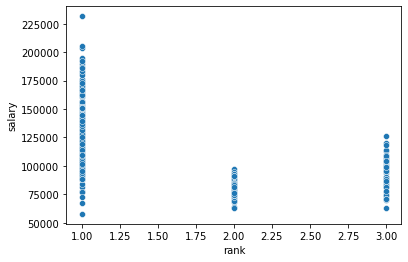

In [21]:
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

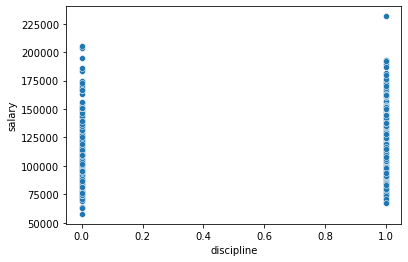

In [22]:
sns.scatterplot(x='discipline',y='salary',data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

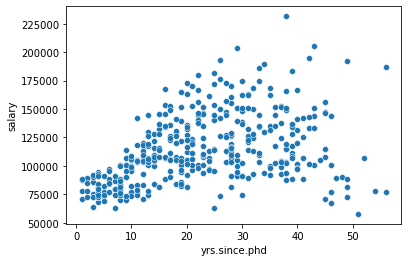

In [23]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

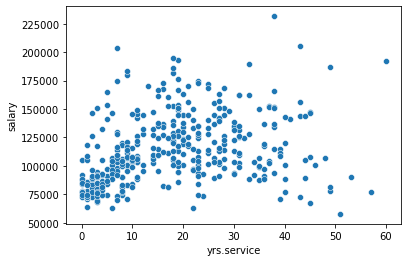

In [24]:
sns.scatterplot(x='yrs.service',y='salary',data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

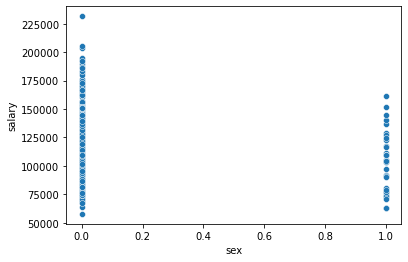

In [25]:
sns.scatterplot(x='sex',y='salary',data=df)

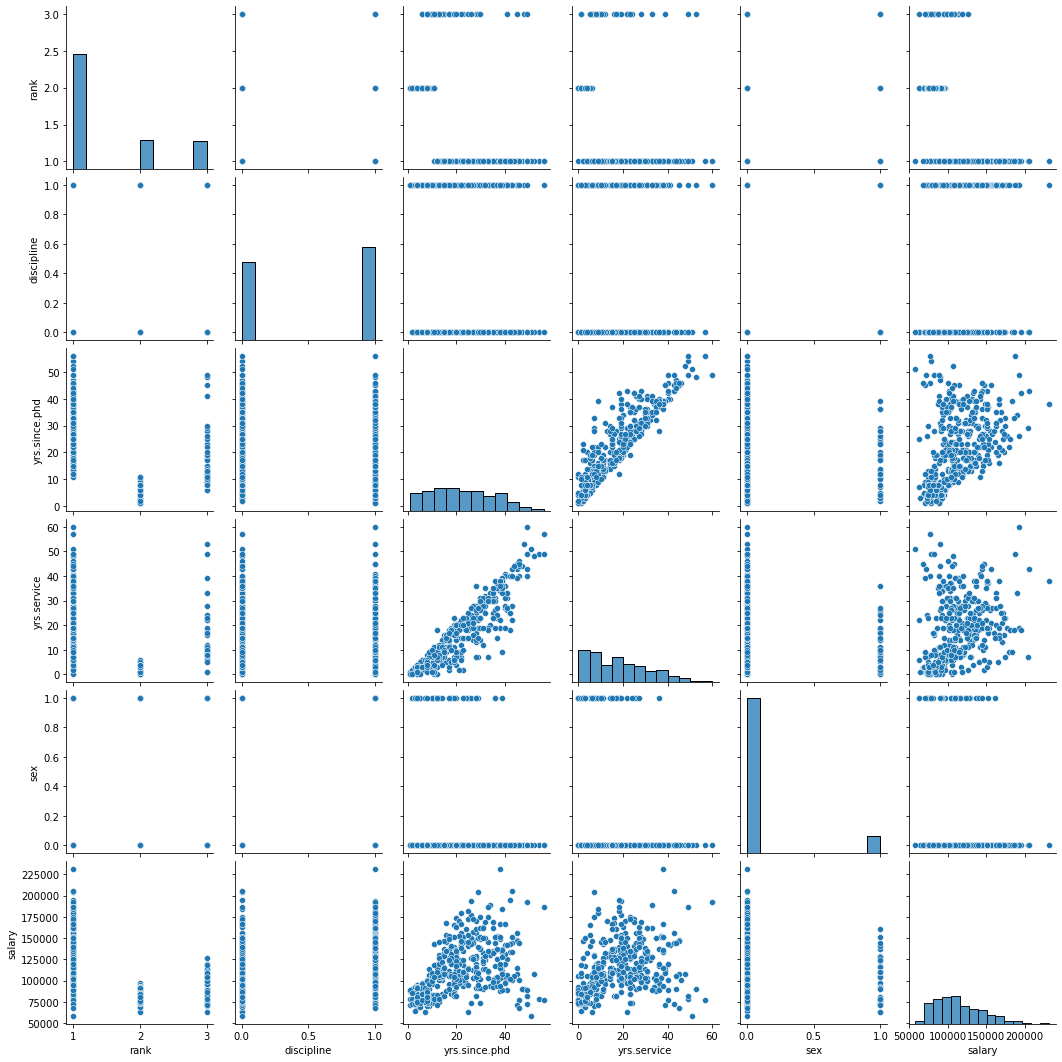

In [26]:
# Let's use pair plot to identify the common distribution of the datasets

sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

# Correlation

In [27]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,0.086266,-0.525500,-0.447499,0.132492,-0.522207
discipline,0.086266,1.000000,-0.218087,-0.164599,-0.003724,0.156084
yrs.since.phd,-0.525500,-0.218087,1.000000,0.909649,-0.148788,0.419231
yrs.service,-0.447499,-0.164599,0.909649,1.000000,-0.153740,0.334745
sex,0.132492,-0.003724,-0.148788,-0.153740,1.000000,-0.138610
salary,-0.522207,0.156084,0.419231,0.334745,-0.138610,1.000000


In [28]:
df.corr()['salary'].sort_values()

rank            -0.522207
sex             -0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

<b>Correlation using heatmap</b>

<AxesSubplot:>

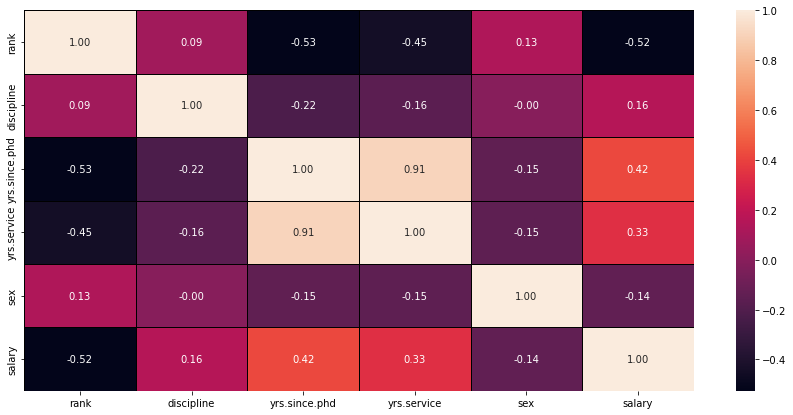

In [29]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt = '.2f')

<b>Outcome of Correlation:</b>

* rank is 52% correlated to salary, which is a good relation.
* discipline is 16% correlated to salary, which is not that good relation.
* yrs.since.phd is 42% correlated to salary, which is a medium relation. 
* yrs.service is 33% correlated to salary, which is medium relation.
* sex is negatively correlated to salary.

* Maximum correlation: rank
* Minimum correlation: discipline
* Negative correlation: sex

# Descriptive Statistics

In [30]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.491184,0.544081,22.314861,17.614610,0.098237,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,1.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,0.000000,91000.000000
50%,1.000000,1.000000,21.000000,16.000000,0.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,0.000000,134185.000000
max,3.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [31]:
# Here, we are taking out "count()", because count of every column is equal,
# and it will not help in our analysis.

df.describe()[1:]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
mean,1.491184,0.544081,22.314861,17.614610,0.098237,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,1.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,0.000000,91000.000000
50%,1.000000,1.000000,21.000000,16.000000,0.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,0.000000,134185.000000
max,3.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [32]:
df.describe()[1:].transpose()

,mean,std,min,25%,50%,75%,max
rank,1.491184,0.757486,1.0,1.0,1.0,2.0,3.0
discipline,0.544081,0.498682,0.0,0.0,1.0,1.0,1.0
yrs.since.phd,22.314861,12.887003,1.0,12.0,21.0,32.0,56.0
yrs.service,17.614610,13.006024,0.0,7.0,16.0,27.0,60.0
sex,0.098237,0.298010,0.0,0.0,0.0,0.0,1.0
salary,113706.458438,30289.038695,57800.0,91000.0,107300.0,134185.0,231545.0


In [33]:
round(df.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
rank,1.49,0.76,1.0,1.0,1.0,2.0,3.0
discipline,0.54,0.50,0.0,0.0,1.0,1.0,1.0
yrs.since.phd,22.31,12.89,1.0,12.0,21.0,32.0,56.0
yrs.service,17.61,13.01,0.0,7.0,16.0,27.0,60.0
sex,0.10,0.30,0.0,0.0,0.0,0.0,1.0
salary,113706.46,30289.04,57800.0,91000.0,107300.0,134185.0,231545.0


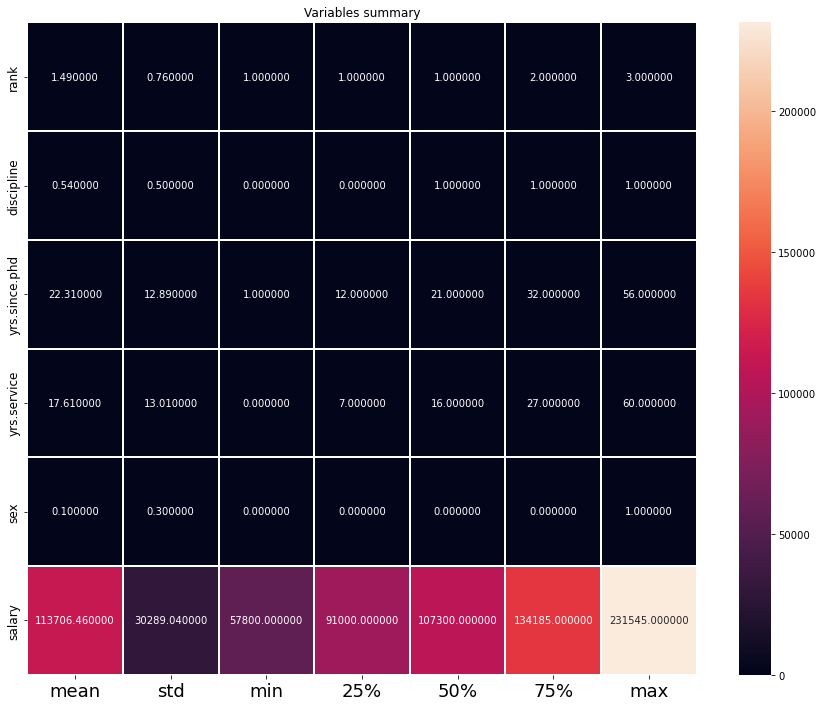

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.savefig('heatmap.png')
plt.show()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int64
 1   discipline     397 non-null    int64
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int64
 5   salary         397 non-null    int64
dtypes: int64(6)
memory usage: 18.7 KB


In [36]:
collist = df.columns.values
ncol = 30
nrows = 14

In [37]:
collist

array(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex',
       'salary'], dtype=object)

# Skewness

In [38]:
df.skew()

rank             1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex              2.709958
salary           0.714568
dtype: float64

<b>Outcome of skewness:</b>

Skewness threshold is taken as +/-0.65

Columns which are having skewness:
* rank
* yrs.service
* sex
* salary

<b>Thus sex has highest skewness. Also, it has no contribution in the prediction of salary. So let's drop this column.</b>

In [39]:
dfnew = df.drop(['sex'], axis=1)

In [40]:
dfnew

,rank,discipline,yrs.since.phd,yrs.service,salary
0,1,1,19,18,139750
1,1,1,20,16,173200
2,2,1,4,3,79750
3,1,1,45,39,115000
4,1,1,40,41,141500
...,...,...,...,...,...
392,1,0,33,30,103106
393,1,0,31,19,150564
394,1,0,42,25,101738
395,1,0,25,15,95329


In [41]:
dfnew.skew()

rank             1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

<AxesSubplot:xlabel='rank', ylabel='Density'>

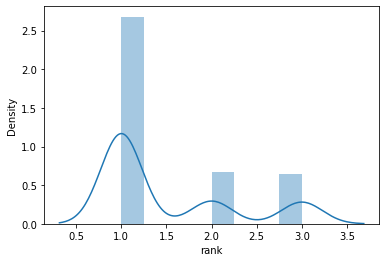

In [42]:
sns.distplot(dfnew["rank"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='discipline', ylabel='Density'>

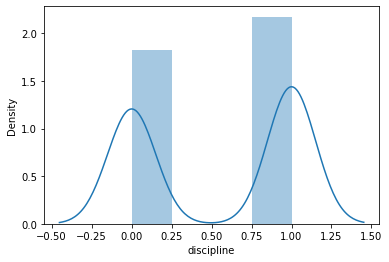

In [43]:
sns.distplot(dfnew["discipline"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

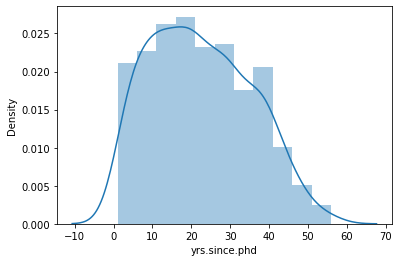

In [44]:
sns.distplot(dfnew["yrs.since.phd"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

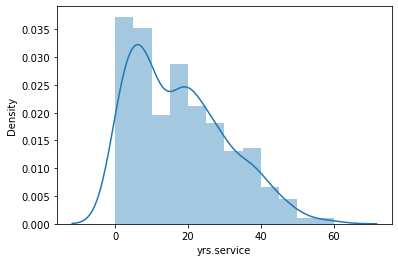

In [45]:
sns.distplot(dfnew["yrs.service"])

<b>The data is not normalized as the building blocks are out of the normal curve.</b>

<b>The normal distribution curve of "salary" is irrelevant.</b>

<b>The normal distribution shows that the data is skewed.</b>

# Separate the data

In [46]:
# Here, "x" contains the independent features

x = dfnew.drop("salary", axis = 1)

In [47]:
# Here, "y" will contain the target variable

y = dfnew["salary"]

In [48]:
x.skew()

rank             1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
dtype: float64

# Transforming data to remove skewness

In [49]:
from sklearn.preprocessing import power_transform

In [50]:
df1 = power_transform(x)

In [51]:
df1 = pd.DataFrame(df1, columns = x.columns)

In [52]:
df1

,rank,discipline,yrs.since.phd,yrs.service
0,-0.698751,0.915403,-0.127295,0.250619
1,-0.698751,0.915403,-0.049178,0.105112
2,1.261201,0.915403,-1.628121,-1.288032
3,-0.698751,0.915403,1.565162,1.416860
4,-0.698751,0.915403,1.279680,1.506524
...,...,...,...,...
392,-0.698751,-1.092415,0.854260,0.976667
393,-0.698751,-1.092415,0.726155,0.320003
394,-0.698751,-1.092415,1.395525,0.698789
395,-0.698751,-1.092415,0.320172,0.028567


In [53]:
df1.skew()

rank             0.753358
discipline      -0.177684
yrs.since.phd   -0.132757
yrs.service     -0.122152
dtype: float64

# Checking Outliers

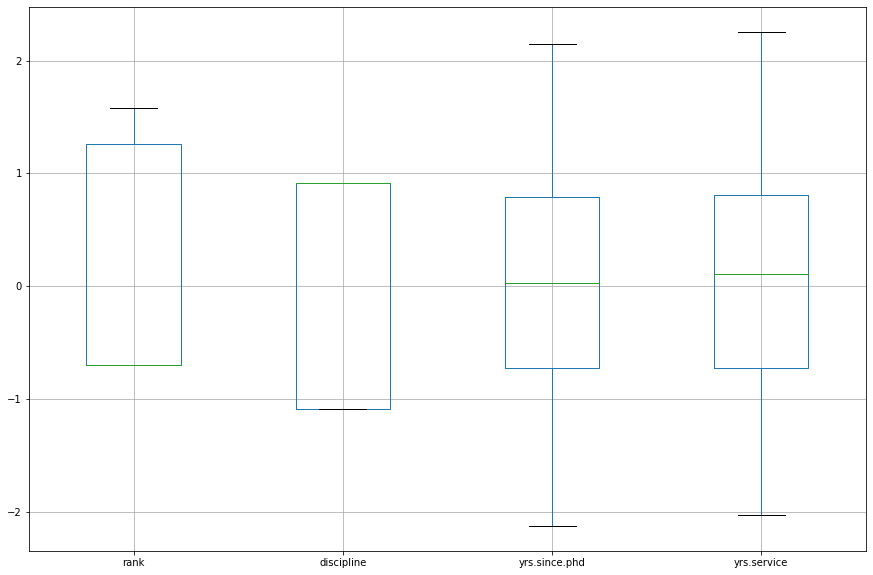

In [54]:
# Let's check the outliers using boxplot

x = df1
x.boxplot(figsize = [15,10])
plt.show()

In [55]:
dfnew

,rank,discipline,yrs.since.phd,yrs.service,salary
0,1,1,19,18,139750
1,1,1,20,16,173200
2,2,1,4,3,79750
3,1,1,45,39,115000
4,1,1,40,41,141500
...,...,...,...,...,...
392,1,0,33,30,103106
393,1,0,31,19,150564
394,1,0,42,25,101738
395,1,0,25,15,95329


# Separate the data

In [56]:
X = dfnew.iloc[:, :-1]

In [57]:
X

,rank,discipline,yrs.since.phd,yrs.service
0,1,1,19,18
1,1,1,20,16
2,2,1,4,3
3,1,1,45,39
4,1,1,40,41
...,...,...,...,...
392,1,0,33,30
393,1,0,31,19
394,1,0,42,25
395,1,0,25,15


In [58]:
Y = dfnew.iloc[: ,-1]

In [59]:
Y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [60]:
X.shape

(397, 4)

In [61]:
Y.shape

(397,)

<b>Linear Regression</b>

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=35)

In [64]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
pred1 = LR.predict(X_test)

print('R2 Score:', r2_score(Y_test, pred1))
print("Mean Absolute Error: ", mean_absolute_error(Y_test,pred1))
print("Mean Squared Error: ", mean_squared_error(Y_test,pred1))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(Y_test, pred1)))

R2 Score: 0.3184314226211221
Mean Absolute Error:  19908.070533001366
Mean Squared Error:  663921796.812288
Root Mean Squared Error:  25766.67997263691


In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
LR_CV = cross_val_score(LR,X,Y,cv=5)
LR_CV = LR_CV.mean()
print('CV Score:', LR_CV*100)

CV Score: 29.505374878865386


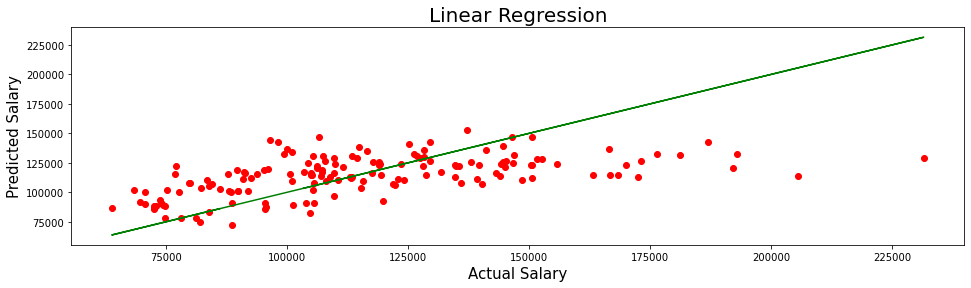

In [67]:
plt.figure(figsize=(16,4))
plt.scatter(x=Y_test, y=pred1, color='r')
plt.plot(Y_test,Y_test, color='g')
plt.xlabel('Actual Salary',fontsize=15)
plt.ylabel('Predicted Salary',fontsize=15)
plt.title('Linear Regression',fontsize=20)
plt.show()

<b>Lasso Regression</b>

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso

In [69]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
LS = Lasso()
LS.fit(X_train,Y_train)
pred2 = LS.predict(X_test)

print('R2 Score', r2_score(Y_test, pred2))
print('Mean absolute error: ',mean_absolute_error(Y_test,pred2))
print('Mean squared error: ',mean_squared_error(Y_test,pred2))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred2)))

R2 Score 0.3184383858575005
Mean absolute error:  19907.771182976205
Mean squared error:  663915013.8640106
Root Mean squared error:  25766.54834982774


In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
LS_CV = cross_val_score(LS,X,Y,cv=5)
LS_CV = LS_CV.mean()

print('CV Score:', LS_CV*100)

CV Score: 29.50603182003993


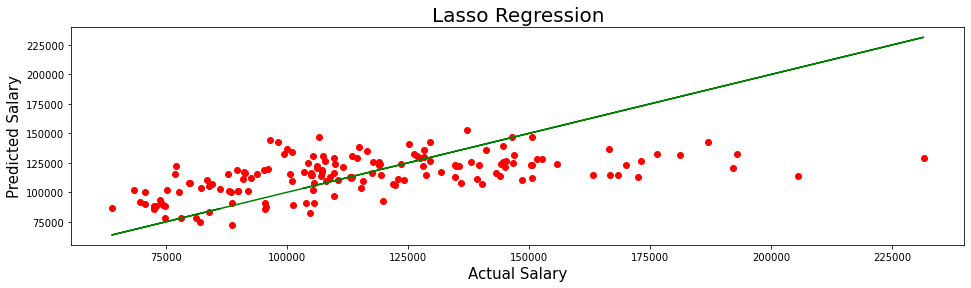

In [72]:
plt.figure(figsize=(16,4))
plt.scatter(x=Y_test, y=pred2, color='r')
plt.plot(Y_test,Y_test, color='g')
plt.xlabel('Actual Salary',fontsize=15)
plt.ylabel('Predicted Salary',fontsize=15)
plt.title('Lasso Regression',fontsize=20)
plt.show()

<b>Ridge Regressor</b>

In [73]:
from sklearn.linear_model import Ridge

In [74]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
RR= Ridge()
RR = Ridge(alpha=0.0001,random_state=0)
RR.fit(X_train,Y_train)
pred3 = RR.predict(X_test)

print('R2 Score:', r2_score(Y_test, pred3))
print('Mean absolute error: ',mean_absolute_error(Y_test,pred3))
print('Mean squared error: ',mean_squared_error(Y_test,pred3))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred3)))

R2 Score: 0.3184314447700122
Mean absolute error:  19908.06881015494
Mean squared error:  663921775.2368644
Root Mean squared error:  25766.679553967842


In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
RR_CV = cross_val_score(RR,X,Y,cv=5)
RR_CV = RR_CV.mean()

print('CV Score:', RR_CV*100)

CV Score: 29.505377952124583


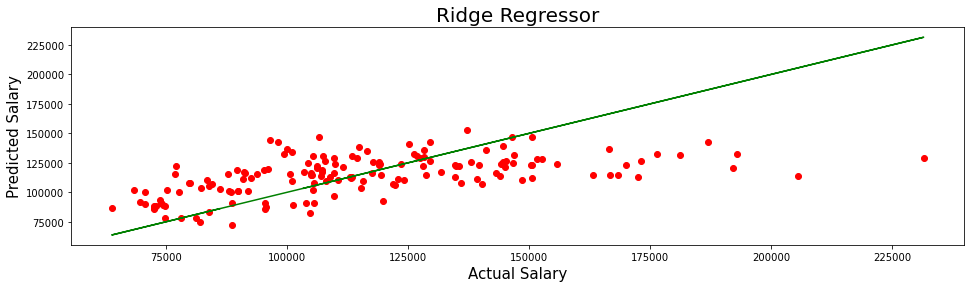

In [77]:
plt.figure(figsize=(16,4))
plt.scatter(x=Y_test, y=pred3, color='r')
plt.plot(Y_test,Y_test, color='g')
plt.xlabel('Actual Salary',fontsize=15)
plt.ylabel('Predicted Salary',fontsize=15)
plt.title('Ridge Regressor',fontsize=20)
plt.show()

<b>Decision Tree Regressor</b>

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
DTR = DecisionTreeRegressor(random_state = 0) 
DTR.fit(X_train,Y_train)
pred4 = DTR.predict(X_test)

print('R2 Score:', r2_score(Y_test, pred4))
print('Mean absolute error: ', mean_absolute_error(Y_test, pred4))
print('Mean squared error: ', mean_squared_error(Y_test, pred4))
print('Root Mean squared error: ', np.sqrt(mean_squared_error(Y_test, pred4)))

R2 Score: -0.04388750732038815
Mean absolute error:  21132.638364779876
Mean squared error:  1016859773.9575472
Root Mean squared error:  31888.238803006152


In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
DTR_CV = cross_val_score(DTR, X, Y, cv=5)
DTR_CV = DTR_CV.mean()

print('CV Score:', DTR_CV*100)

CV Score: -10.154192740876919


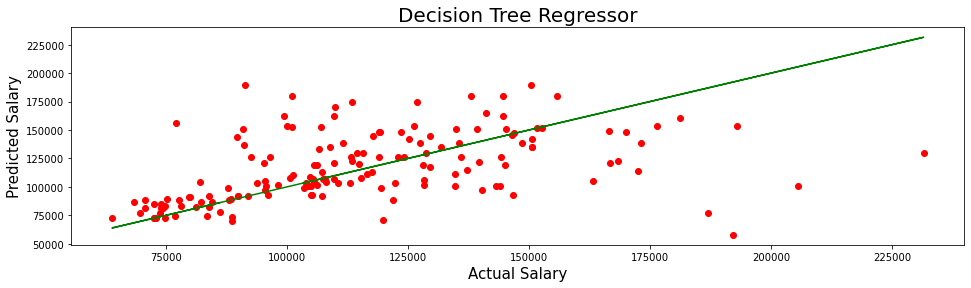

In [82]:
plt.figure(figsize=(16,4))
plt.scatter(x=Y_test, y=pred4, color='r')
plt.plot(Y_test,Y_test, color='g')
plt.xlabel('Actual Salary',fontsize=15)
plt.ylabel('Predicted Salary',fontsize=15)
plt.title('Decision Tree Regressor',fontsize=20)
plt.show()

<b>K-Neighbors Regressor</b>

In [83]:
from sklearn import neighbors

In [84]:
KNN = neighbors.KNeighborsRegressor(n_neighbors=7)

KNN.fit(X_train, Y_train)

pred5 = KNN.predict(X_test)

print('R2 Score:', r2_score(Y_test, pred5))
print('Mean absolute error: ',mean_absolute_error(Y_test,pred5))
print('Mean squared error: ',mean_squared_error(Y_test,pred5))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(Y_test,pred5)))

R2 Score: 0.28552433475745254
Mean absolute error:  18621.47079964061
Mean squared error:  695976873.3334618
Root Mean squared error:  26381.373605888337


In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
KNN_CV = cross_val_score(KNN, X, Y, cv=5)
KNN_CV = KNN_CV.mean()

print('CV Score:', KNN_CV*100)

CV Score: 20.841301948481565


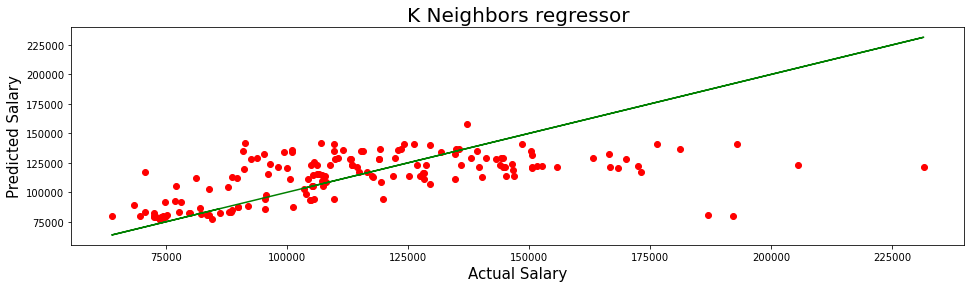

In [87]:
plt.figure(figsize=(16,4))
plt.scatter(x=Y_test, y=pred5, color='r')
plt.plot(Y_test,Y_test, color='g')
plt.xlabel('Actual Salary',fontsize=15)
plt.ylabel('Predicted Salary',fontsize=15)
plt.title('K Neighbors regressor',fontsize=20)
plt.show()

# Hyperparameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

KNN = neighbors.KNeighborsRegressor()

SALARY_MODEL = GridSearchCV(KNN, params, cv=5)
SALARY_MODEL.fit(X_train,Y_train)
SALARY_MODEL.best_params_

{'n_neighbors': 8}

<b>Thus, we can conclude that the best model is K-Neighbors Regressor, as the difference between the percentage score of cross validation and r2_score is optimum.</b>

# Model Saving

In [90]:
import pickle

filename ='salary.pkl'
pickle.dump(KNN, open(filename,'wb'))